In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
%matplotlib inline

In [2]:
PATH_DATA = "/mnt/data/git/WikiBrain/src/main/resources/clusters/"
PATH_WW2 = PATH_DATA + "ww2/part-00000"
PATH_SB = PATH_DATA + "superBowl/part-00000"
PATH_CHARLIE = PATH_DATA + "charlie_cluster/part-00000"
PATH_CHARLIE_NGBHRS = PATH_DATA + "charlie/part-00000"
PATH_CHARLIE_WEEK = PATH_DATA + "charlie_week/part-00000"
PATH_FERGUSON_WEEK = PATH_DATA + "ferguson_week/part-00000"
PATH_GERMANWINGS_WEEK = PATH_DATA + "germanwings_week/part-00000"
PATH_GERMANWINGS_MONTH = PATH_DATA + "germanwings_month/part-00000"

PATH_WW2_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned _WW2_labels.csv"
PATH_SB_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned_FEB_SB_cluster.csv"
PATH_CHARLIE_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned_charlie_cluster.csv"
PATH_CHARLIE_NGHBRS_LABELS = PATH_DATA + "trainded_graphs_1_0_cleaned _Charlie.csv"
PATH_CHARLIE_WEEK_LABELS = PATH_DATA + "Charlie_Hebdo_one_week_5_12_January.csv"
PATH_FERGUSON_WEEK_LABELS = PATH_DATA + "Ferguson_one_week_22_03_December.csv"
PATH_GERMANWINGS_WEEK_LABELS = PATH_DATA + "GermanWings_week.csv"
PATH_GERMANWINGS_MONTH_LABELS = PATH_DATA + "GermanWings_month.csv"

In [10]:
PATH_ACTIVATIONS = PATH_SB #actications
PATH_LABELS = PATH_SB_LABELS # labels

In [11]:
with open(PATH_ACTIVATIONS) as f:
    content = f.readlines()

In [12]:
content = map(
    lambda x: map(
        lambda s: s.replace('(', '').replace(')','').replace('[','').replace(']','').replace('.0', ''), x.split(',')), 
    [x.strip() for x in content])

In [13]:
content = map(lambda l: [int(x) for x in l], content)

In [14]:
ids = map(lambda l: l[0], content)

In [15]:
with open(PATH_LABELS) as f:
    idsLabels = f.readlines()
idsLabels = [x.strip() for x in idsLabels]

In [16]:
idsLabels = map(lambda l: (int(l[0]), l[1]), map(lambda t: t.split(','), idsLabels))
idsLabels_ = idsLabels

In [17]:
import string
printable = set(string.printable)
idsLabels = map(lambda l: (int(l[0]), filter(lambda x: x in printable, l[1])), idsLabels)

In [18]:
idsLabels = dict(idsLabels)

### GO TO PLOT SECTION
### Filtering for particular clusters (Run only if needed)

#### 1. SB: Only NFL teams

In [19]:
nfl_teams = ['Buffalo_Bills','Miami_Dolphins','New_England_Patriots','New_York_Jets','Baltimore_Ravens','Cincinnati_Bengals','Cleveland_Browns','Pittsburgh_Steelers','Houston_Texans','Indianapolis_Colts','Jacksonville_Jaguars','Tennessee_Titans','Denver_Broncos','Kansas_City_Chiefs','Los_Angeles_Chargers','Oakland_Raiders','Dallas_Cowboys','New_York_Giants','Philadelphia_Eagles','Washington_Redskins','Chicago_Bears','Detroit_Lions','Green_Bay_Packers','Minnesota_Vikings','Atlanta_Falcons','Carolina_Panthers','New_Orleans_Saints','Tampa_Bay_Buccaneers','Arizona_Cardinals','Los_Angeles_Rams','San_Francisco_49ers','Seattle_Seahawks']

In [20]:
count = 0
for team in nfl_teams:
    if team in idsLabels.values():
        count += 1
count

30

In [21]:
nfl_labels = []
for team in nfl_teams:
    for label in idsLabels_:
        if label[1] == team:
            nfl_labels.append(label)

In [22]:
import string
printable = set(string.printable)
nfl_labels = map(lambda l: (int(l[0]), filter(lambda x: x in printable, l[1])), nfl_labels)

In [23]:
nfl_labels = dict(nfl_labels)

In [24]:
contentSB = []
for c in content:
    if c[0] in nfl_labels.keys():
        contentSB.append(c)
content = contentSB

In [25]:
idsLabels = nfl_labels

#### 2. CHARLIE. Remove particular pages by index in the "content" array

In [ ]:
indexToDelete = [2,6,12,18,20]
deleted = 0

for i in indexToDelete:
    i -= deleted
    deleted += 1
    del content[i]
    del ids[i]

### PLOT

In [26]:
months = ['October', 'November', 'December', 'January', 'February', 'March', 'April']

In [27]:
x_mon = [i for i in np.arange(0, len(content[0]), 7*24)]
x_sat = [i for i in np.arange(5*24, len(content[0]), 7*24)]
x_month = [i for i in np.arange(8*24, len(content[0]), 30*24)]

In [28]:
x_month[1] = x_month[1] + 24 #October
x_month[2] = x_month[2] + 24 #November
x_month[3] = x_month[3] + 48 #December
x_month[4] = x_month[4] + 72 #January
x_month[5] = x_month[5] + 24 #February
x_month[6] = x_month[6] + 48 #March
x_month[7] = x_month[7] + 48 #April

In [29]:
from pylab import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [30]:
sorted_content = sorted(content, key = lambda c: c[0])

In [31]:
ids = idsLabels.keys()
ids.sort()
# ids = ids # for Charlie neighbors filtering. If needed

#### Activations

In [ ]:
rcParams['figure.figsize'] = 50, 70
rcParams['xtick.labelsize'] = 50
rcParams['ytick.labelsize'] = 50
plt.imshow(map(lambda l: l[0:], sorted_content), cmap="Blues", interpolation='nearest', aspect='auto', norm=colors.PowerNorm(gamma=1./10.))
plt.colorbar()
plt.xticks([i + 15*24 for i in x_month], [month for month in months])
plt.yticks([i for i in range(0,len(sorted_content))], [idsLabels[x] for x in ids])
# for xc in x_mon:
#     plt.axvline(x=xc, linewidth=1, color = 'b')
for xc in x_month:
    plt.axvline(x=xc, linewidth=1, color = 'r')
# for xc in x_sat:
#     plt.axvline(x=xc, linewidth=1, color = 'g')
plt.show()

### Overall cluster activity

In [32]:
content_t = np.transpose(map(lambda l: l[1:],content))
summary = [sum(l) for l in content_t]

In [33]:
from math import log

#### Summary timeline

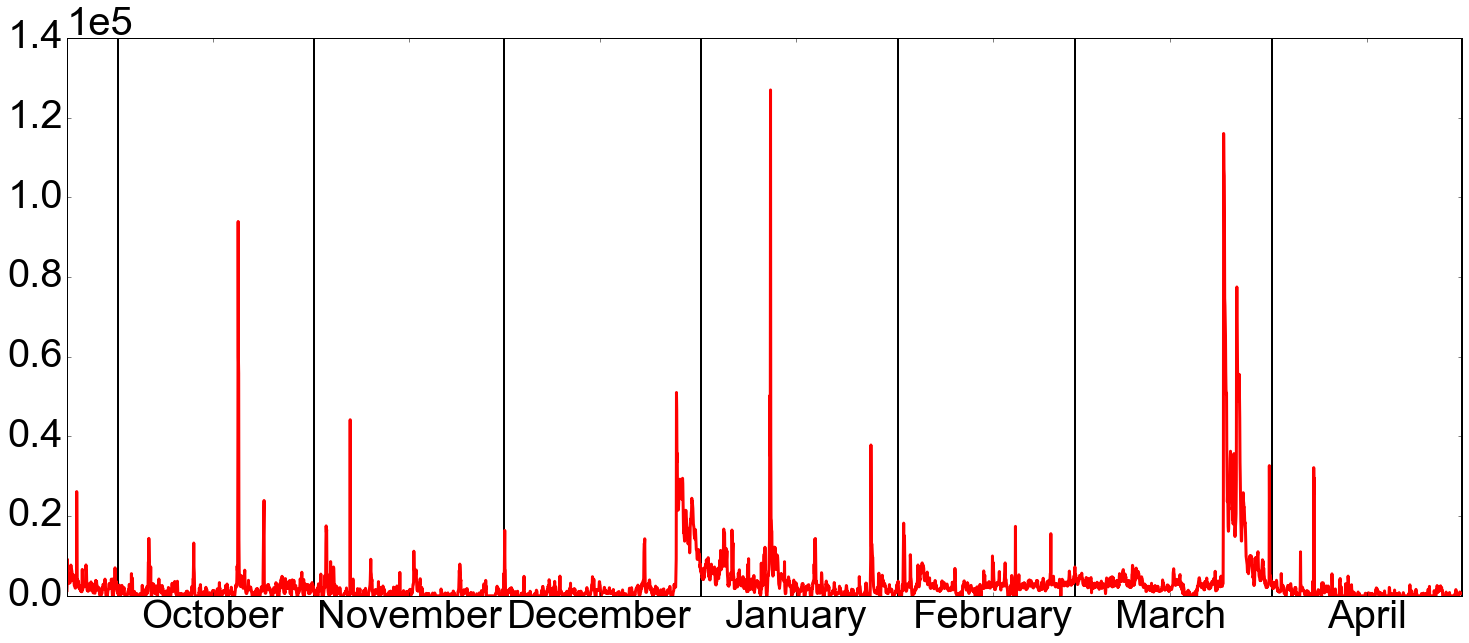

In [21]:
rcParams['figure.figsize'] = 25, 10
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 40
# plt.grid()
# for xc in x_mon:
#     plt.axvline(x=xc, linewidth=1, color = 'b')
for xc in x_month:
    plt.axvline(x=xc, linewidth=2, color = 'black')
# for xc in x_sat:
#     plt.axvline(x=xc, linewidth=1, color = 'g')
x_ticks = [i + 15*24 for i in x_month]
x_ticks[-1] -= 15*24
plt.xticks(x_ticks, [month for month in months])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(summary, 'r', linewidth=3)

In [ ]:
plt.savefig("germanwings_activity.pdf", format='pdf', dpi=200)

#### Activations + Summary timeline

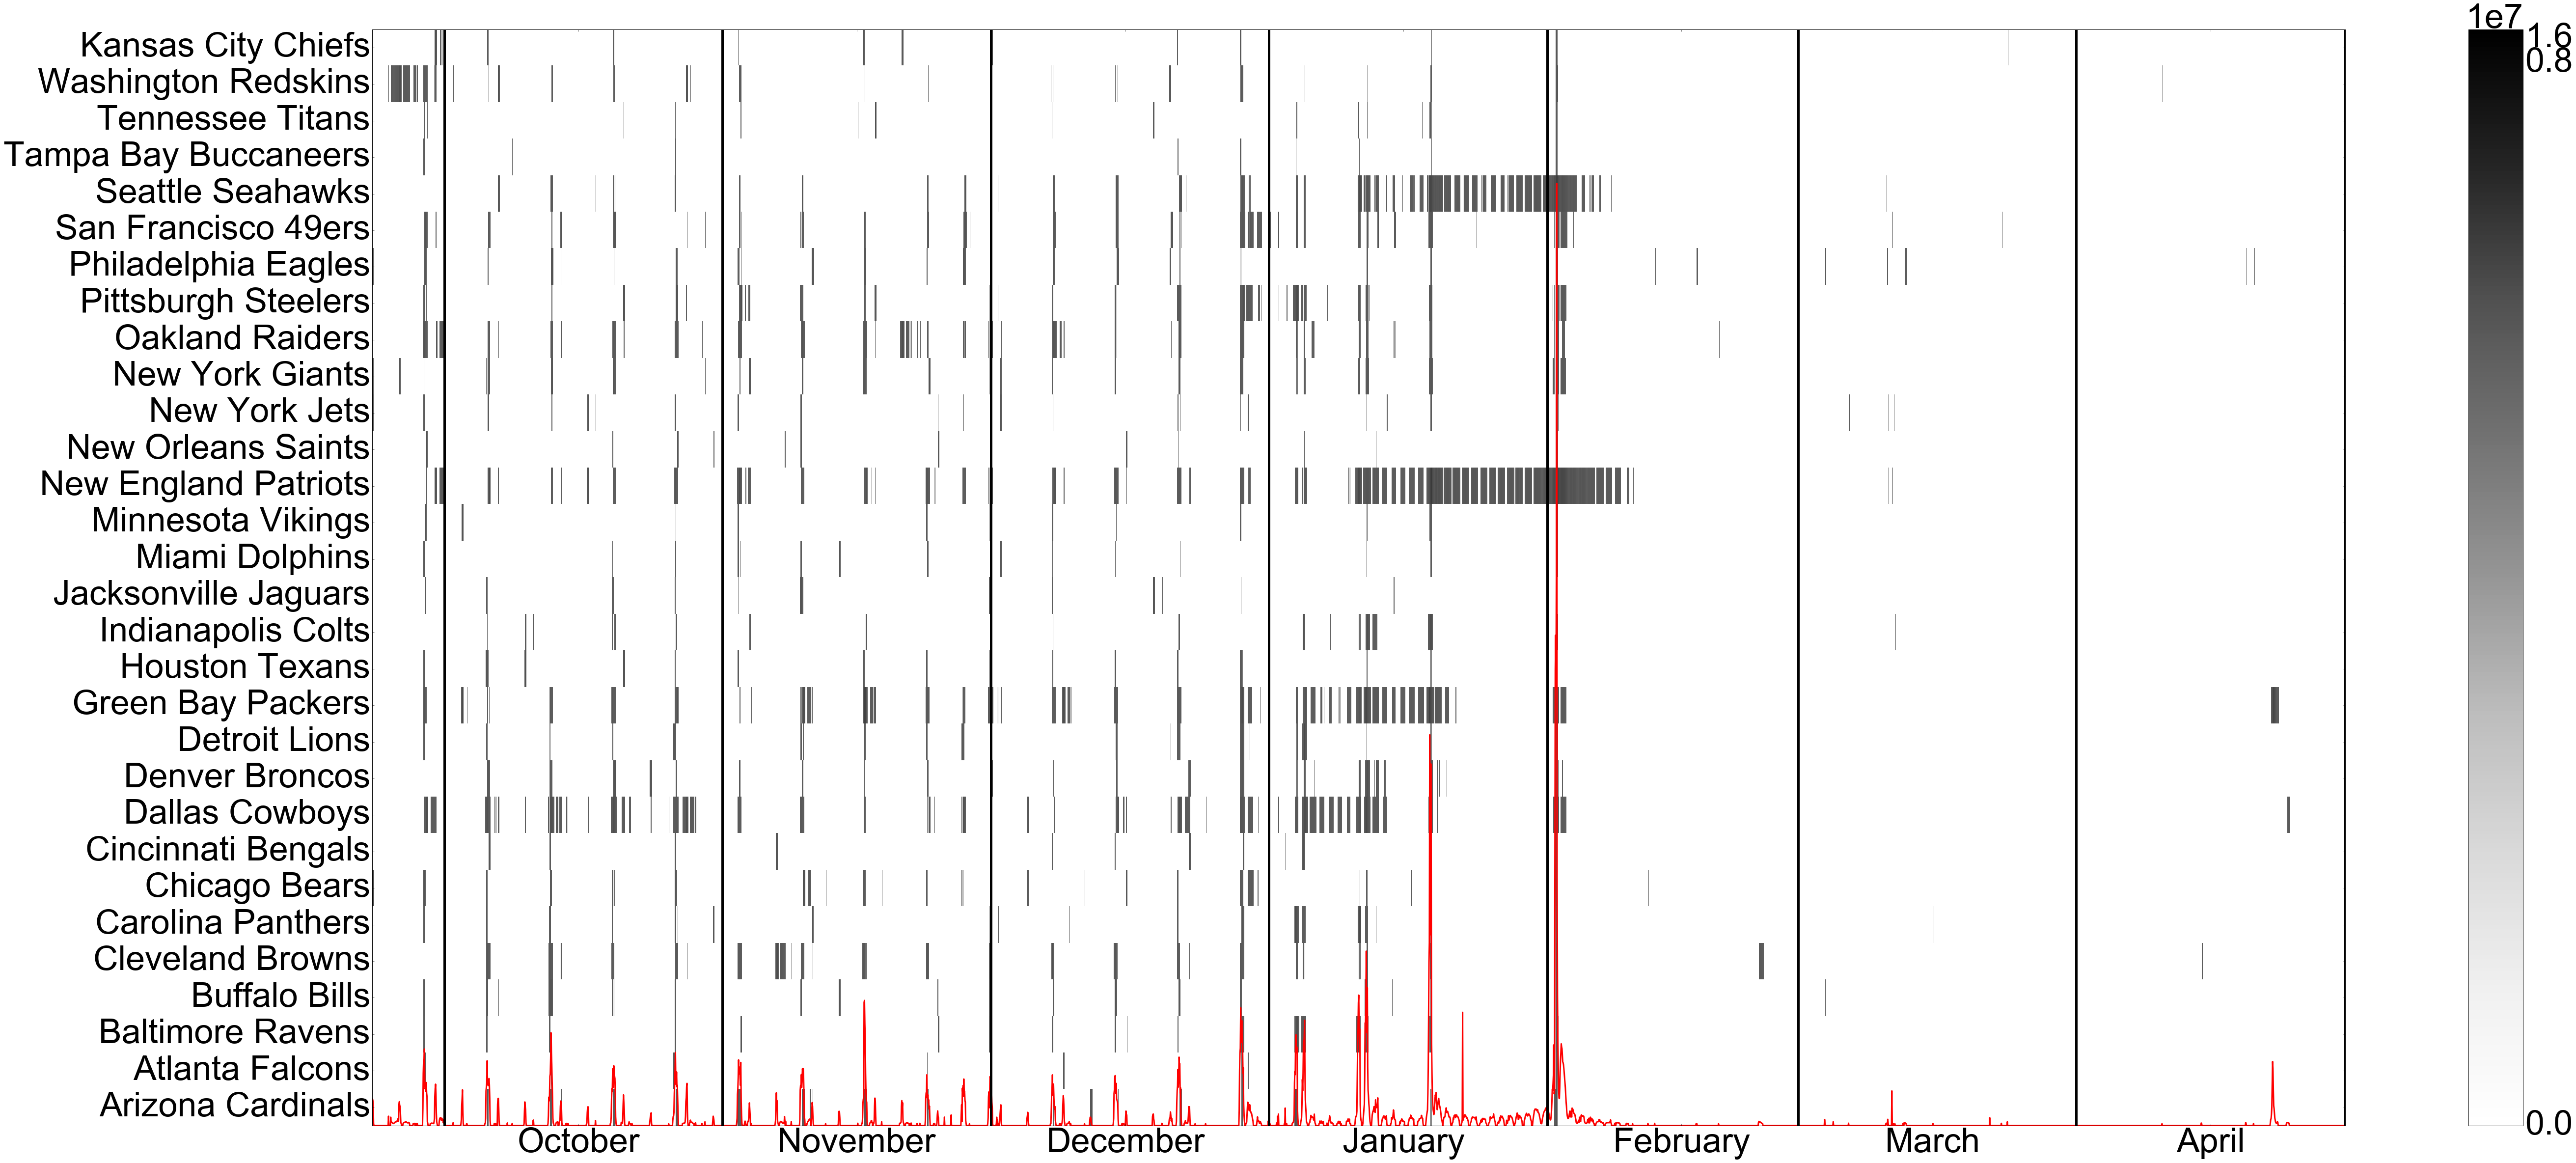

In [34]:
rcParams['figure.figsize'] = 90, 40
rcParams['xtick.labelsize'] = 70
rcParams['ytick.labelsize'] = 70
# rcParams["ytick.color"] = "w"
# rcParams["xtick.color"] = "w"
# rcParams["figure.facecolor"] = '#121212'

ids = idsLabels.keys()
ids.sort()
scaling_factor = 0.0001
#plot overall statistics
# plt.plot([s * scaling_factor - 0.5 for s in summary], '#00FF00', linewidth=3)
plt.plot([s * scaling_factor - 0.5 for s in summary], 'r', linewidth=3)
plt.ylim([-0.5, len(content) - 0.5])
#plot activations
plt.imshow(map(lambda l: l[0:], sorted_content), cmap="Greys", interpolation='nearest', aspect='auto', norm=colors.PowerNorm(gamma=1./30.))
plt.yticks([i for i in range(0,len(sorted_content))], [idsLabels[x].replace("_", " ") for x in ids])
x_ticks = [i + 15*24 for i in x_month]
x_ticks[-1] -= 15*24
plt.xticks(x_ticks, [month for month in months])
# for xc in x_mon:
#     plt.axvline(x=xc, linewidth=1, color = 'b')
for xc in x_month:
    plt.axvline(x=xc, linewidth=5, color = 'black')
# for xc in x_sat:
#     plt.axvline(x=xc, linewidth=1, color = 'g')
from matplotlib import ticker
cb = plt.colorbar()
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

# plt.show()

In [ ]:
plt.savefig("activity.svg", format='svg', bbox_inches='tight')